# AS4PA - Laboratory session 3

`Student:` **```Ardino Rocco```**<br>
`Master :` **```Physics of Data```**<br>
`Id     :` **```1231629```**<br>
`Mail   :` **```rocco.ardino@studenti.unipd.it```**<br>

# Index <a class="anchor" id="ExI"></a>

1. [Exercise 1](#Ex1.)<br>
    1.1. [Determination of the constant $c$](#Ex1.1.)<br>
    1.2. [Set of the four R statistical functions](#Ex1.2.)<br>
    1.3. [Probability calculations](#Ex1.3.)<br>
2. [Exercise 2](#Ex2.)<br>
    2.1. [Set of the four R statistical functions](#Ex2.1.)<br>
    2.2. [Probability calculations](#Ex2.2.)<br>
    2.3. [Sample, mean and variance](#Ex2.3.)<br>
3. [Exercise 3](#Ex3.)<br>
    3.1. [Exponential](#Ex3.1.)<br>
    3.2. [Uniform](#Ex3.2)<br>
    3.3. [Binomial](#Ex3.3.)<br>
    3.4. [Poisson](#Ex3.4.)<br>
4. [Exercise 4](#Ex4.)<br>
    4.1. [Normal](#Ex4.1.)<br>
    4.2. [Exponential](#Ex4.2.)<br>
    4.3. [Uniform](#Ex4.3.)<br>
    4.4. [Poisson](#Ex4.4.)<br>

**Before starting with the exercises, load packages for:**
* **a better plot visualization on jupyter notebook (```repr```);**
* **computing the inverse of a function in a certain domain (```GoFKernel```);**
* **latex font for text (```latex2exp```).**

In [1]:
library(repr)
library(GoFKernel)
library(latex2exp)

Loading required package: KernSmooth

KernSmooth 2.23 loaded
Copyright M. P. Wand 1997-2009



***
## Exercise 1 <a class="anchor" id="Ex1."></a>
* [Index](#ExI)
***

### 1.1. - Determination of the constant $c$ <a class="anchor" id="Ex1.1."></a>

**The determination of $c$ can be done by integrating the function and setting the result to $1$ since we are dealing with a PDF:**

$$
I = \int_{D(x)} \mathrm{d}x \ f(x) := 1
\qquad
\Longrightarrow
\qquad
1 = c \int_1^2 \mathrm{d}x \ (x-1)(x-2) = c \cdot I
\qquad
\Longrightarrow
\qquad
\boxed{
c=\frac{1}{I}
}
$$

In [2]:
I <- integrate(f=function(x) (x-1)*(2-x), lower=1, upper=2)
c <- I$value^-1

In [3]:
cat("c =", c)

c = 6

**So, from the previous cell, it is possible to see that the value of $c$ is:**

$$
\boxed{
c=6
}
$$

### 1.2. - Set of the four R statistical functions <a class="anchor" id="Ex1.2."></a>

**In the cells below, the implementation of the four R statistical functions is given, giving particular attention to the vectorization and to avoid ```for``` loops. This is done to boost the performances.**

**PDF implementation**

In [4]:
dTOLC <- function(x) {
    res <- ifelse(x<2 & x>1,
                  6*(x-1)*(2-x),
                  0.)
    return(res)
}

**CDF implementation**

In [5]:
pTOLC <- function(x) {
    res <- ifelse(x<2 & x>1,
                  5 - 12*x + 9*x^2 - 2*x^3,
                  ifelse(x<=1,
                         0.,
                         1.))
    return(res)
}

**Quantile function implementation**

In [6]:
qTOLC <- Vectorize(inverse(pTOLC, lower=1, upper=2))

**Random sampling from PDF implementation**

In [7]:
rTOLC <- function(n) {
    return(qTOLC(runif(n)))
}

**Plot the PDF and the CDF**

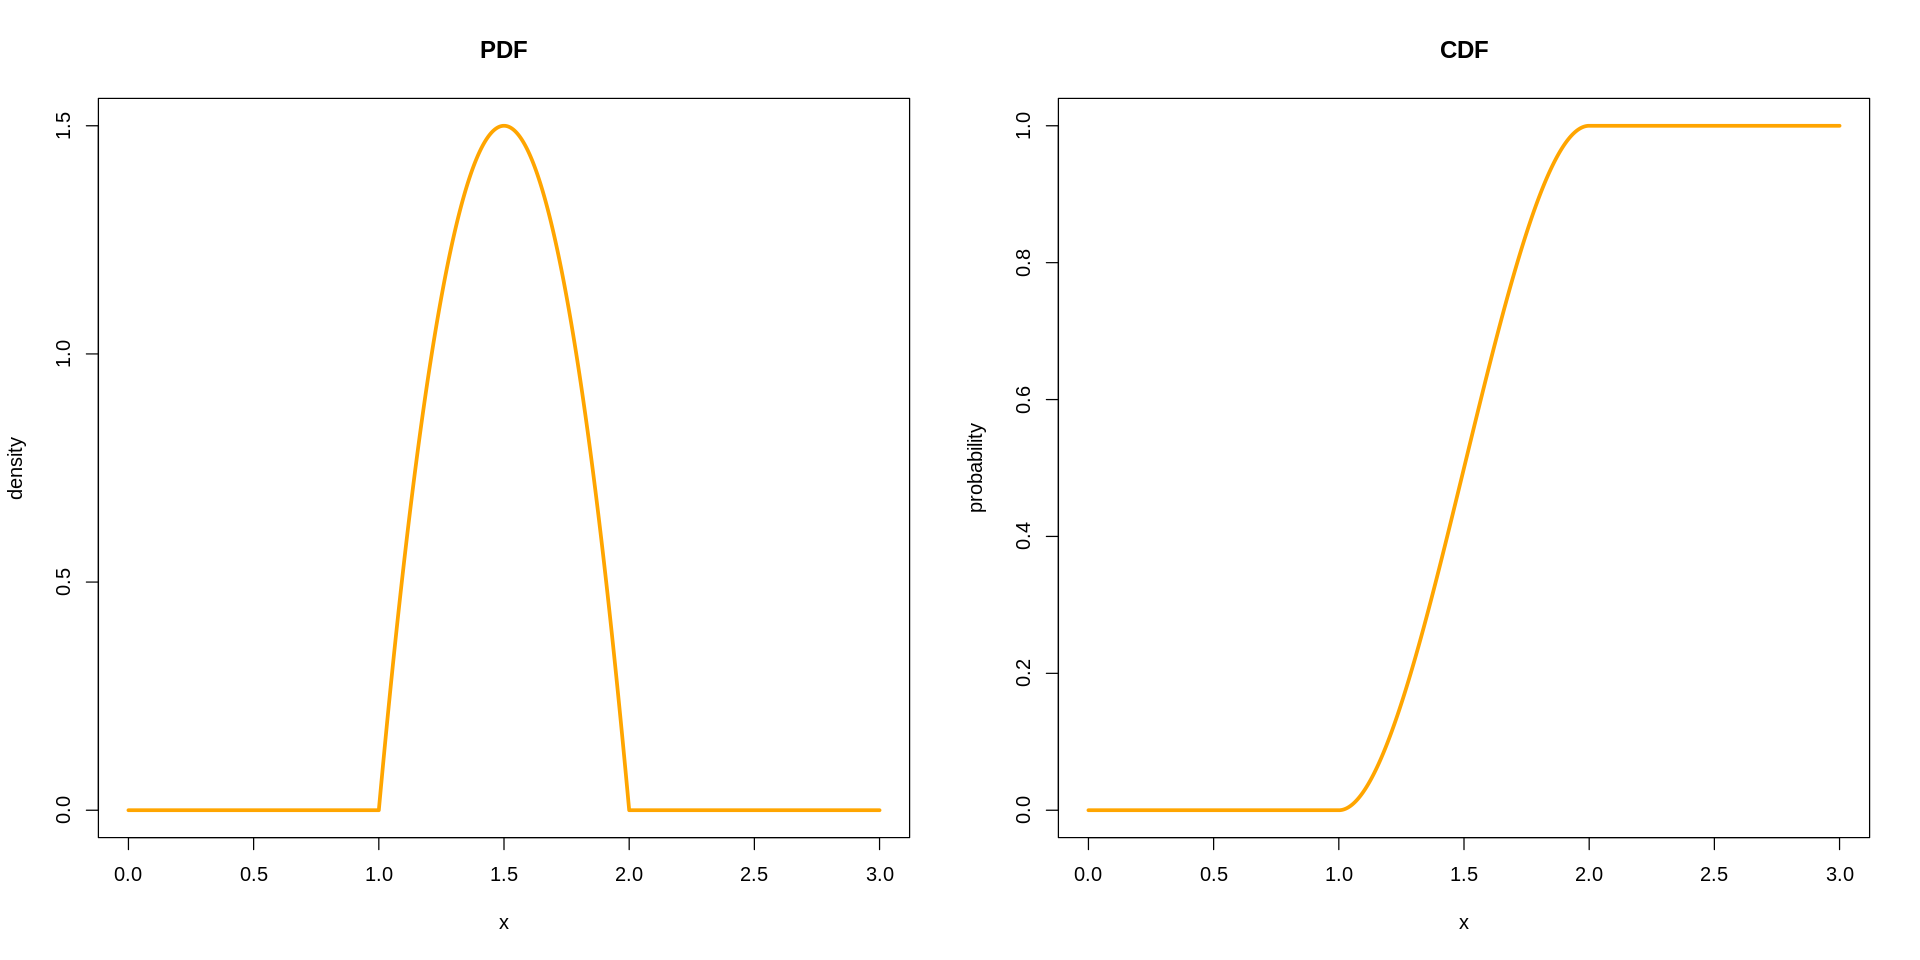

In [8]:
x <- seq(from=0, to=3, by=0.001)

ddata <- dTOLC(x)
cdata <- pTOLC(x)

par(mfrow=c(1,2))
options(repr.plot.width=16, repr.plot.height=8)
plot(x, ddata, col='orange', type='l', xlab='x', ylab='density',     main='PDF', lwd=3)
plot(x, cdata, col='orange', type='l', xlab='x', ylab='probability', main='CDF', lwd=3)

### 1.3. - Probability calculations <a class="anchor" id="Ex1.3."></a>

**Use the previous defined CDF to evaluate the probabilities**

In [9]:
p.1 <- 1 - pTOLC(1.25)
p.2 <- pTOLC(2.0) - pTOLC(1.5)

cat("Probability of test finished in    t>75  min:", p.1, "\n")
cat("Probability of test finished in 90<t<120 min:", p.2)

Probability of test finished in    t>75  min: 0.84375 
Probability of test finished in 90<t<120 min: 0.5

**The results, calculated in the previous cell, are:**

$$
\boxed{
\mathbb{P}(t>75 \ \text{min}) \approx 0.84
}
$$

$$
\boxed{
\mathbb{P}(90 < t < 120 \ \text{min}) = 0.50
}
$$

***
## Exercise 2 <a class="anchor" id="Ex2."></a>
* [Index](#ExI)
***

### 2.1. - Set of the four R statistical functions <a class="anchor" id="Ex2.1."></a>

**As in the previous exercise, in the cells below, the implementation of the four R statistical functions is given, focusing on the performances and on the vectorization.**

**PDF implementation**

In [10]:
dlifetime <- function(x) {
    res <- ifelse(x<2 & x>1,
                  2/x^2,
                  0.)
    return(res)
}

**CDF implementation**

In [11]:
plifetime <- function(x) {
    res <- ifelse(x<2 & x>1,
                  2 - 2/x,
                  ifelse(x<=1,
                         0.,
                         1.))
    return(res)
}

**Quantile function implementation**

In [12]:
qlifetime <- function(p) {
    res <- ifelse(p<1 & p>0,
                  2/(2-p),
                  "p out of bounds")
    return(res)
}

**Random sampling from PDF implementation**

In [13]:
rlifetime <- function(n) {
    return(qlifetime(runif(n)))
}

**Plot the PDF and the CDF**

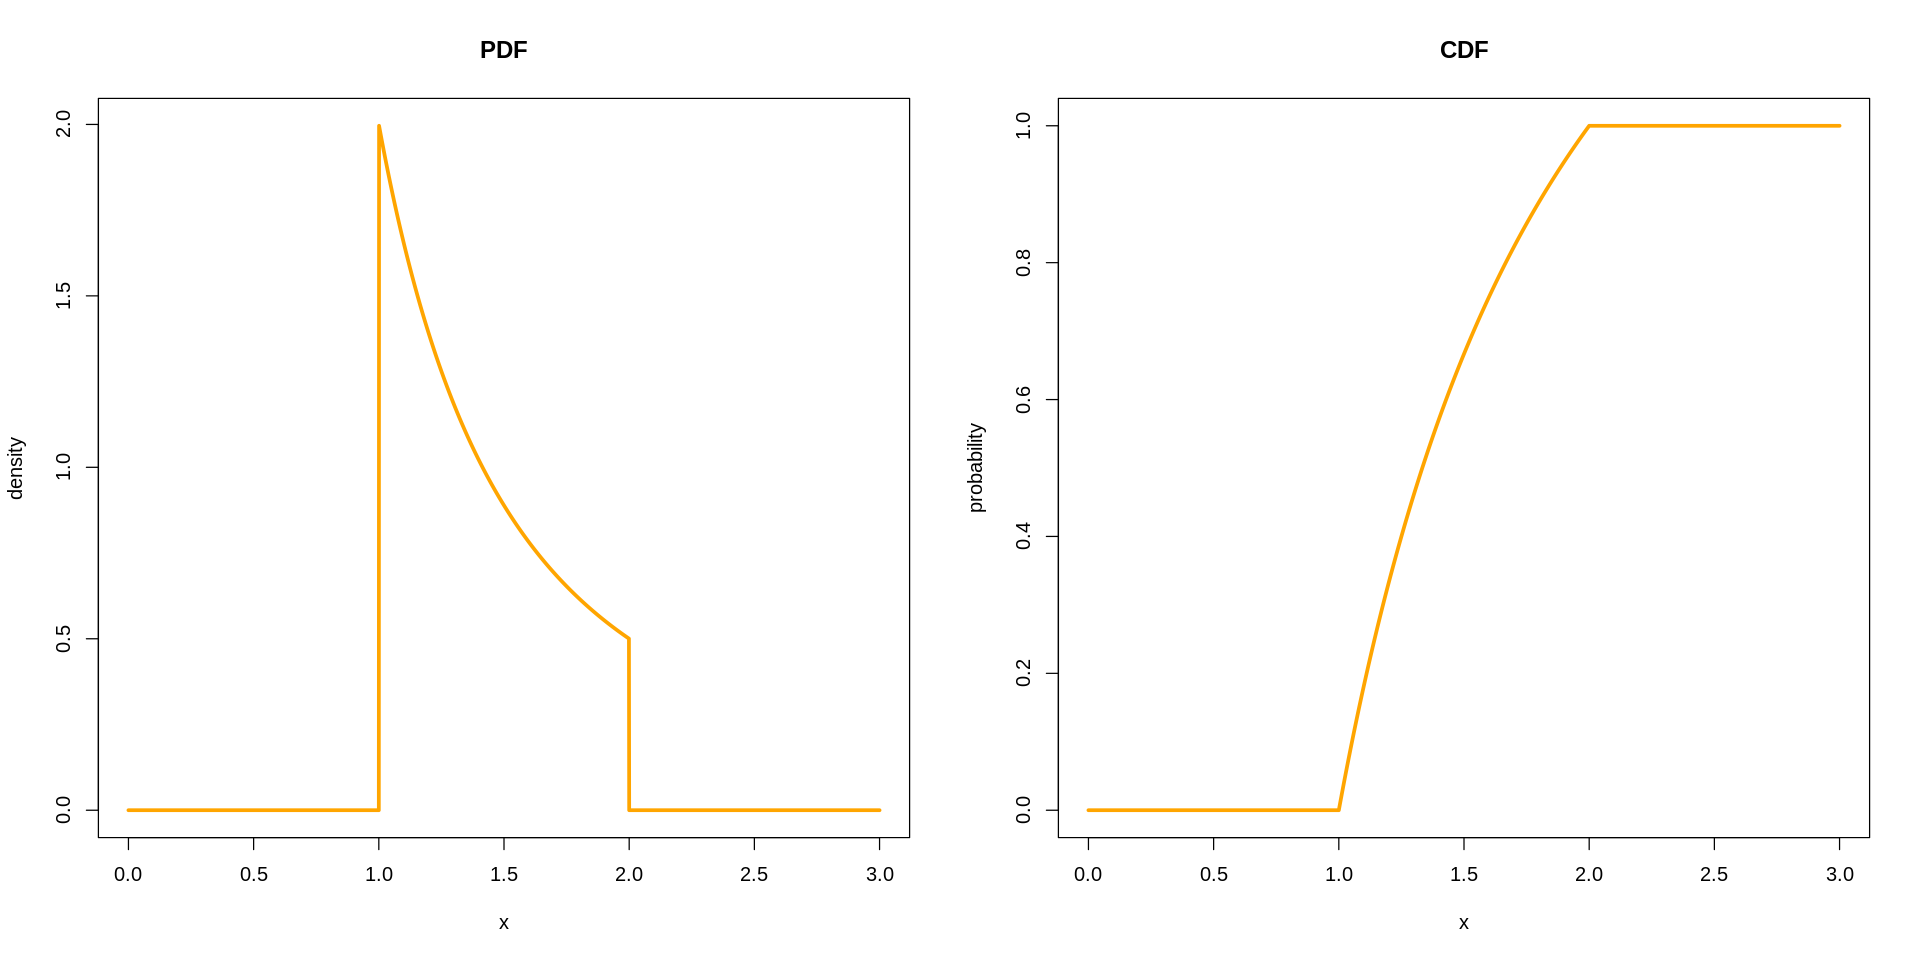

In [14]:
x <- seq(from=0, to=3, by=0.001)

ddata <- dlifetime(x)
cdata <- plifetime(x)

par(mfrow=c(1,2))
options(repr.plot.width=16, repr.plot.height=8)
plot(x, ddata, col='orange', type='l', xlab='x', ylab='density',     main='PDF', lwd=3)
plot(x, cdata, col='orange', type='l', xlab='x', ylab='probability', main='CDF', lwd=3)

### 2.2. - Probability calculations <a class="anchor" id="Ex2.2."></a>

In [15]:
p.1 <- plifetime(1.5)

cat("Probability of tires lasting <1.5e4 km:", p.1, "\n")

Probability of tires lasting <1.5e4 km: 0.6666667 


**The result, calculated in the previous cell, is:**

$$
\boxed{
\mathbb{P}(x<1.5 \cdot 10^4 \ \text{km}) \approx 0.67 
}
$$

### 2.3. - Sample, mean and variance <a class="anchor" id="Ex2.3."></a>

**Sample 3000 random variables from the distribution through ```rlifetime```**

In [16]:
N <- 3000

In [17]:
rdata <- rlifetime(N)

**Compute mean and variance**

In [18]:
rdata.mean <- mean(rdata)
rdata.var  <- mean(rdata^2) - rdata.mean^2

cat("Sampled variables mean:    ", rdata.mean, "\n")
cat("Sampled variables variance:", rdata.var)

Sampled variables mean:     1.380523 
Sampled variables variance: 0.07638718

**So, the results are:**

$$
\mathbb{E}[X] \approx \sum_{i=1}^N \frac{x_i}{N} \approx \boxed{1.38 \cdot 10^4 \ \text{km}}
$$

$$
\text{Var}[X] = \mathbb{E}[X^2] - \mathbb{E}[X]^2
\approx
\sum_{i=1}^N \frac{x_i^2}{N} - \left(\sum_{i=1}^N \frac{x_i}{N}\right)^2
\approx
\boxed{0.079 \cdot 10^8 \ \text{km}^2}
$$

***
## Exercise 3 <a class="anchor" id="Ex3."></a>
* [Index](#ExI)
***

**Before starting, let's consider Markov's inequality:**

$$
\mathbb{P}(X \ge k) \le \frac{\mathbb{E}[X]}{k}
\ \ \ \ \ \ \
\text{for} \ k>0,
$$

**and let's introduce the following notation:**

$$
G(k)
:=
\mathbb{P}(X \ge k)
=
1 - \mathbb{P}(X < k)
$$

$$
M(k)
:=
\frac{\mathbb{E}[X]}{k}
$$

**In the next cells, I'm going to plot these two quantities for different distributions and to show graphically if Markov's inequality holds.**

### 3.1. - Exponential <a class="anchor" id="Ex3.1."></a>

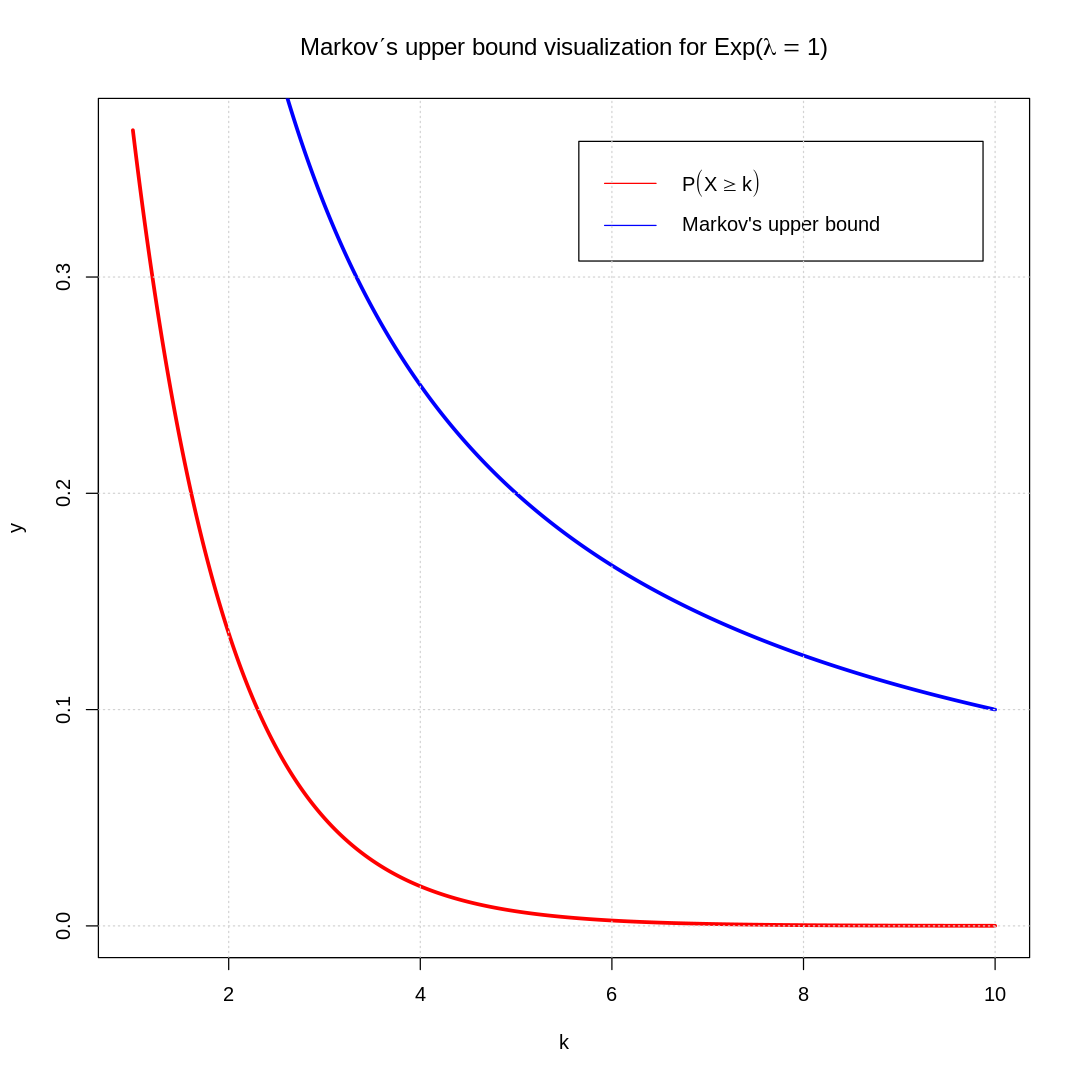

In [19]:
k <- seq(1, 10, 0.01)
g <- 1 - pexp(k, rate=1)
m <- 1/k


options(repr.plot.width=9, repr.plot.height=9)
plot (k, g, 
      col='red', 
      type='l', lwd=3,
      xlab='k', ylab='y', 
      main=TeX("Markov's upper bound visualization for $Exp(\\lambda = 1)$"))
lines(k, m, 
      lwd=3,
      col='blue', 
      type='l')
legend("topright", 
       inset=0.05, 
       legend=c(expression(P(X>=k)),"Markov's upper bound"),
       col=c("red", "blue"), 
       lty=1:1, 
       cex=1,
       box.lty=1)
grid()

### 3.2. - Uniform <a class="anchor" id="Ex3.2."></a>

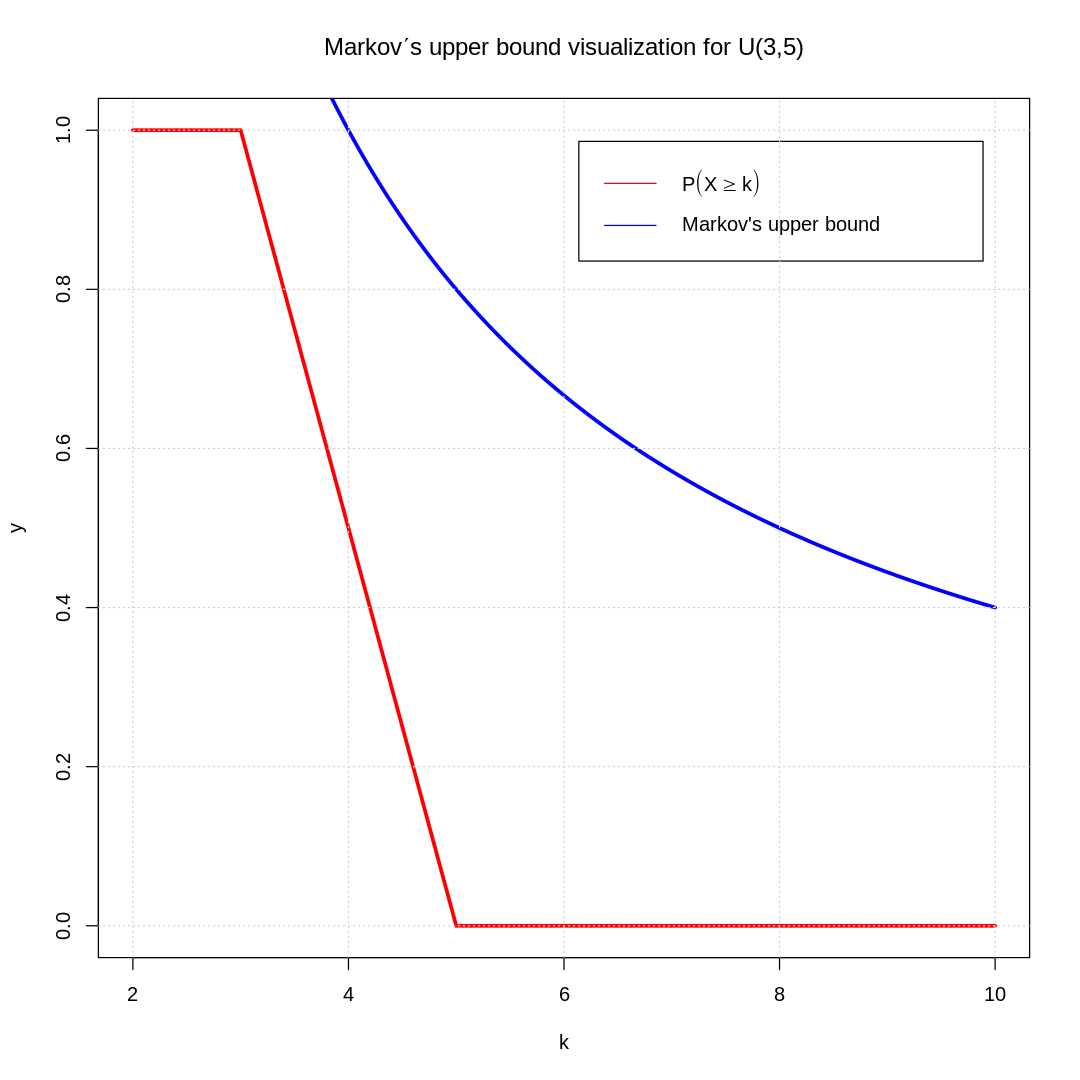

In [20]:
k <- seq(2, 10, 0.01)
g <- 1 - punif(k, min=3, max=5)
m <- 4/k


options(repr.plot.width=9, repr.plot.height=9)
plot (k, g, 
      col='red', 
      type='l', lwd=3,
      xlab='k', ylab='y', 
      main=TeX("Markov's upper bound visualization for $U(3,5)$"))
lines(k, m, 
      lwd=3,
      col='blue', 
      type='l')
legend("topright", 
       inset=0.05, 
       legend=c(expression(P(X>=k)),"Markov's upper bound"),
       col=c("red", "blue"), 
       lty=1:1, 
       cex=1,
       box.lty=1)
grid()

### 3.3. - Binomial <a class="anchor" id="Ex3.3."></a>

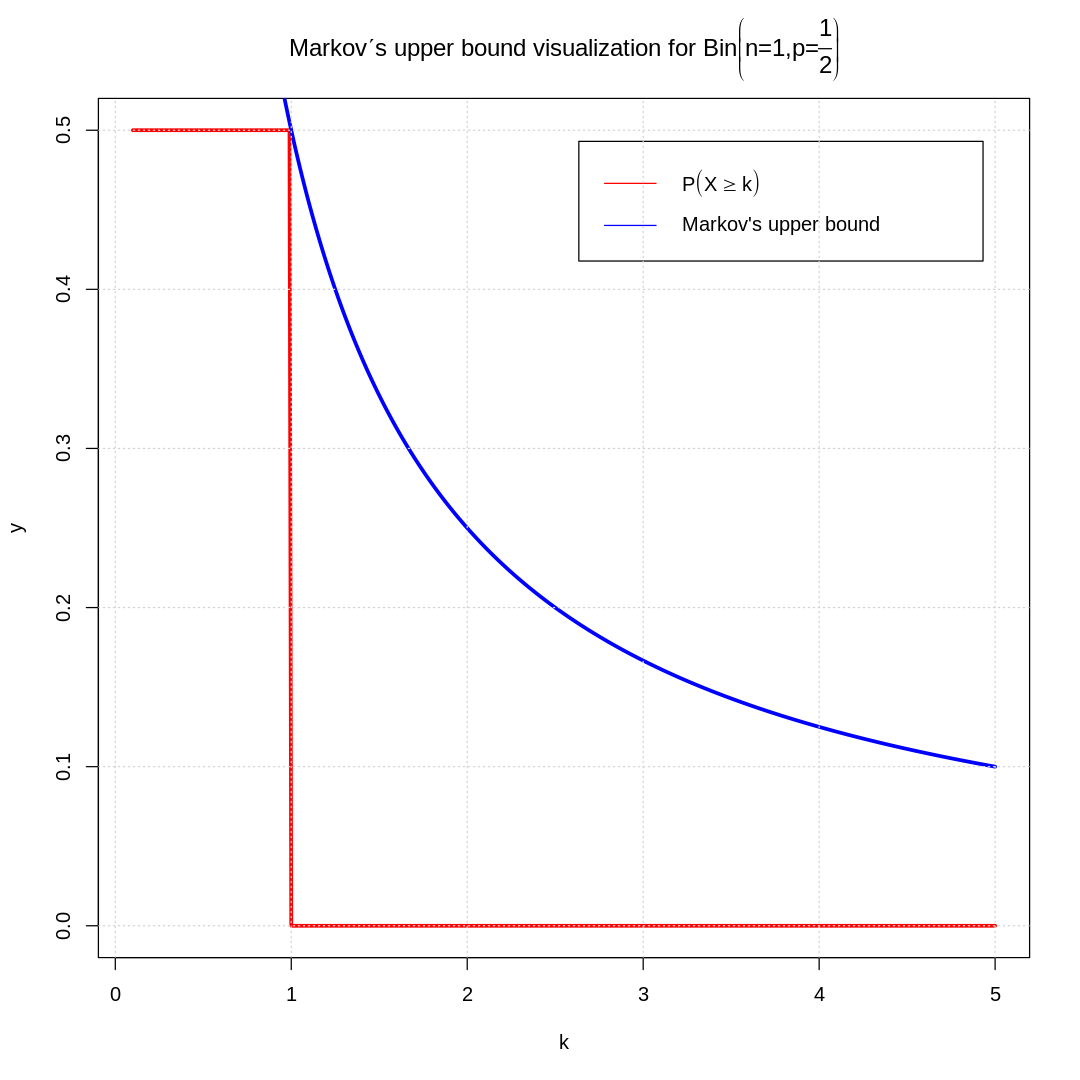

In [21]:
k <- seq(0.1, 5, 0.01)
g <- 1 - pbinom(k, size=1, prob=0.5)
m <- 0.5/k


options(repr.plot.width=9, repr.plot.height=9)
plot (k, g, 
      col='red', 
      type='l', lwd=3,
      xlab='k', ylab='y', 
      main=TeX("Markov's upper bound visualization for $Bin\\left(n=1, p=\\frac{1}{2}\\right)$"))
lines(k, m, 
      lwd=3,
      col='blue', 
      type='l')
legend("topright", 
       inset=0.05, 
       legend=c(expression(P(X>=k)),"Markov's upper bound"),
       col=c("red", "blue"), 
       lty=1:1, 
       cex=1,
       box.lty=1)
grid()

### 3.4. - Poisson <a class="anchor" id="Ex3.4."></a>

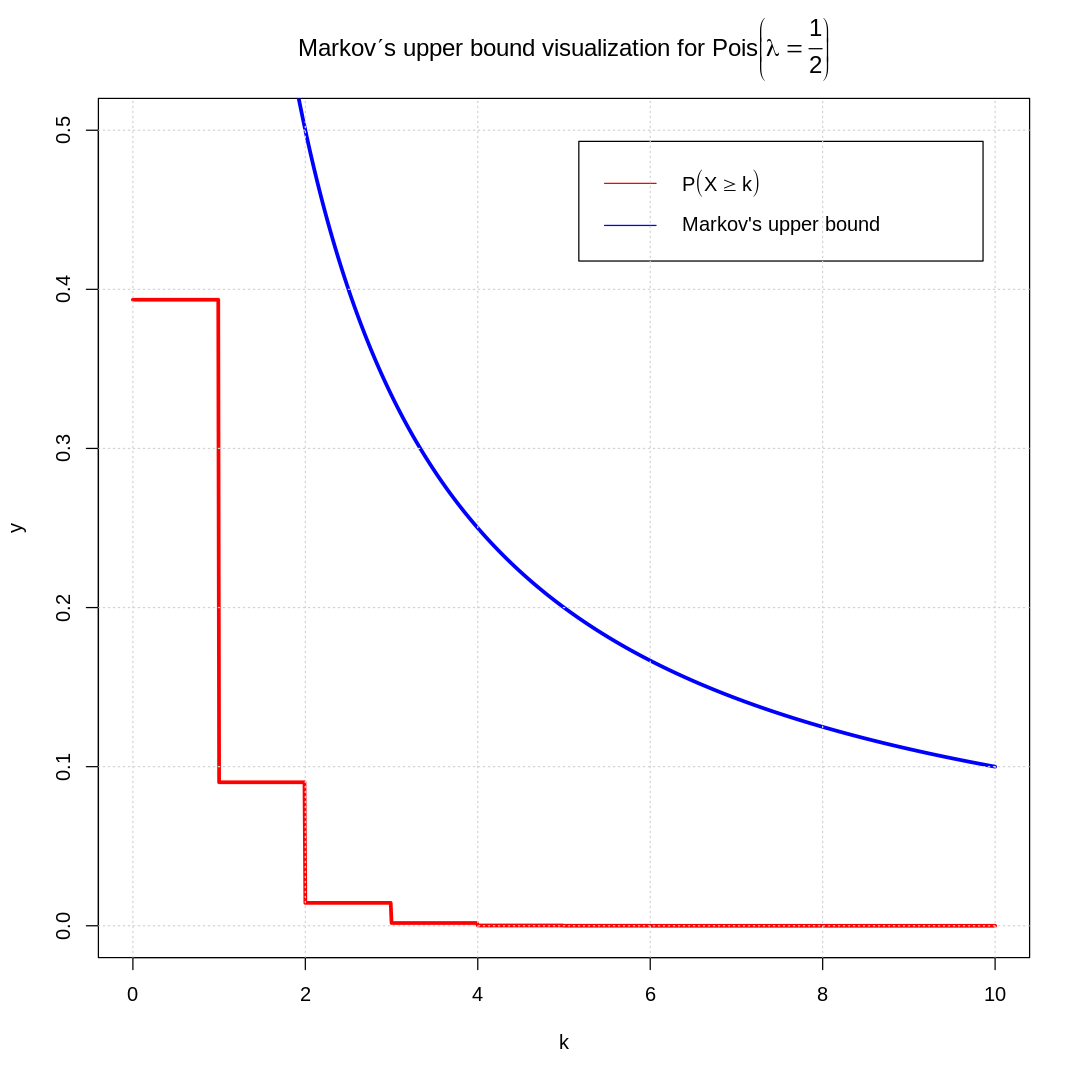

In [22]:
k <- seq(0, 10, 0.01)
g <- 1 - ppois(k, lambda=0.5)
m <- 1/k


options(repr.plot.width=9, repr.plot.height=9)
plot (k, g, 
      col='red', 
      type='l', lwd=3,
      ylim=c(0,0.5),
      xlab='k', ylab='y', 
      main=TeX("Markov's upper bound visualization for $Pois\\left(\\lambda = \\frac{1}{2}\\right)$"))
lines(k, m, 
      lwd=3,
      col='blue', 
      type='l')
legend("topright", 
       inset=0.05, 
       legend=c(expression(P(X>=k)),"Markov's upper bound"),
       col=c("red", "blue"), 
       lty=1:1, 
       cex=1,
       box.lty=1)
grid()

***
## Exercise 4 <a class="anchor" id="Ex4."></a>
* [Index](#ExI)
***

**Before starting, let's consider Chebyshev's inequality:**

$$
\mathbb{P}(|X-\mu| \ge k\sigma) \le \frac{1}{k^2}
\Longrightarrow
\mathbb{P}(|X-\mu| < k\sigma) \ge 1 - \frac{1}{k^2}
$$

**So it is possible to reformulate the exercise by verifying the second inequality of the upper equation:**

$$
\mathbb{P}(|X-\mu| < k\sigma)
=
\mathbb{P}(\mu - k\sigma < X < \mu + k\sigma)
=
\mathbb{P}(X < \mu + k\sigma) - \mathbb{P}(X < \mu - k\sigma)
$$

**Therefore, we have to show that:**

$$
G(k; \mu, \sigma)
:=
\text{CDF}(X =  \mu + k\sigma) - \text{CDF}(X =  \mu - k\sigma)
\ge
1 - \frac{1}{k^2}
=:
C(k)
$$

**In practice, what we can do is plotting the functions $G(k; \mu, \sigma)$ and $C(k)$, and then verifying that $G(k; \mu, \sigma)$ is under $C(k)$. If this behaviour is confirmed for $k>0$, then the we have showed that Chebyshev’s inequality is an upper bound for the distributions under study.**

### 4.1. - Normal <a class="anchor" id="Ex4.1."></a>

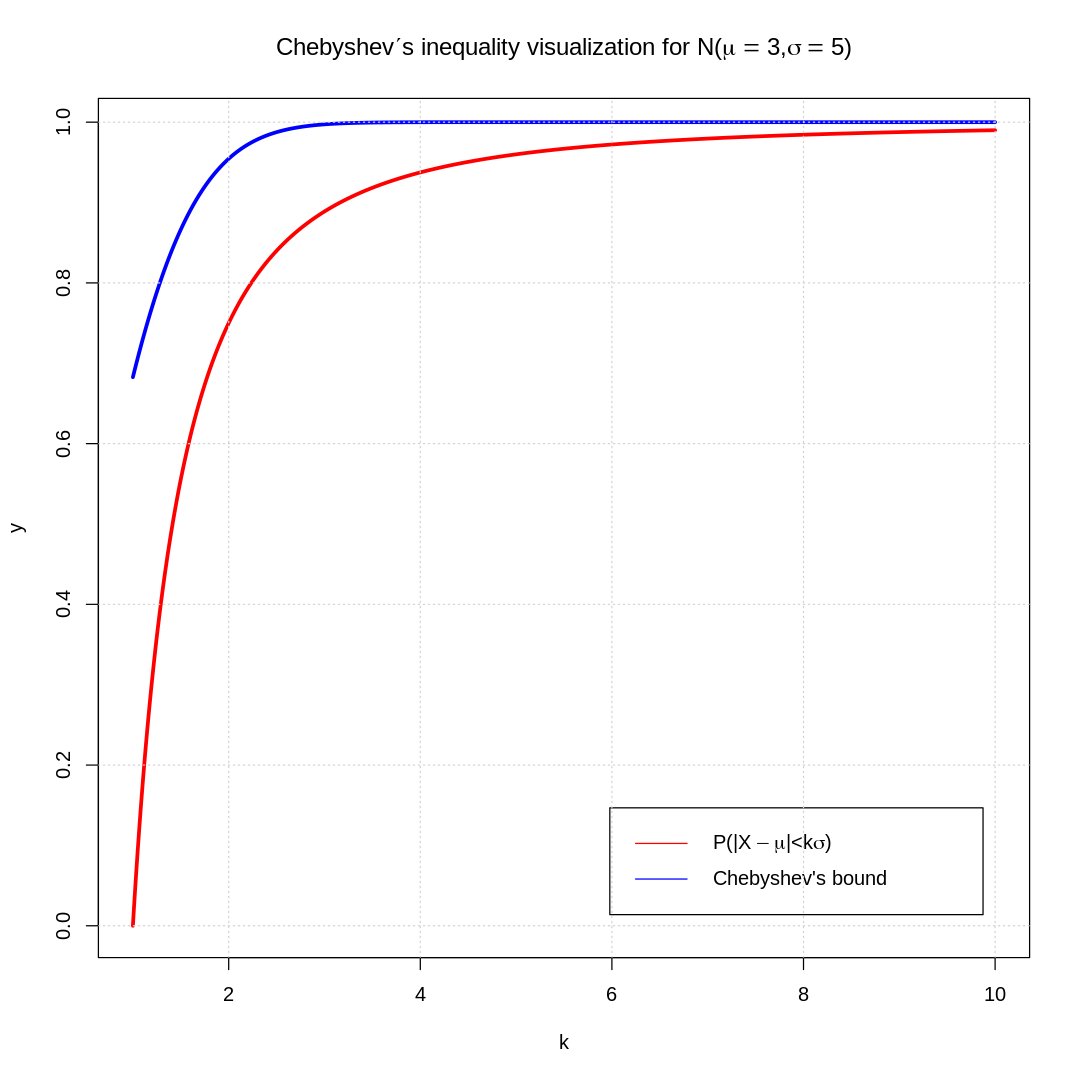

In [23]:
mu <- 3
sd <- 5

k <- seq(1, 10, 0.01)
g <- pnorm(mu + k*sd, mean=mu, sd=sd) - pnorm(mu - k*sd, mean=mu, sd=sd)
c <- 1 - 1/k^2


options(repr.plot.width=9, repr.plot.height=9)
plot (k, c, 
      col='red', 
      type='l', lwd=3,
      xlab='k', ylab='y', 
      main=TeX("Chebyshev's inequality visualization for $N(\\mu = 3, \\sigma = 5)$"))
lines(k, g, 
      lwd=3,
      col='blue', 
      type='l')
legend("bottomright", 
       inset=0.05, 
       legend=c(TeX("$P(| X - \\mu | < k \\sigma )$"),"Chebyshev's bound"),
       col=c("red", "blue"), 
       lty=1:1, 
       cex=1,
       box.lty=1)
grid()

### 4.2. - Exponential <a class="anchor" id="Ex4.2."></a>

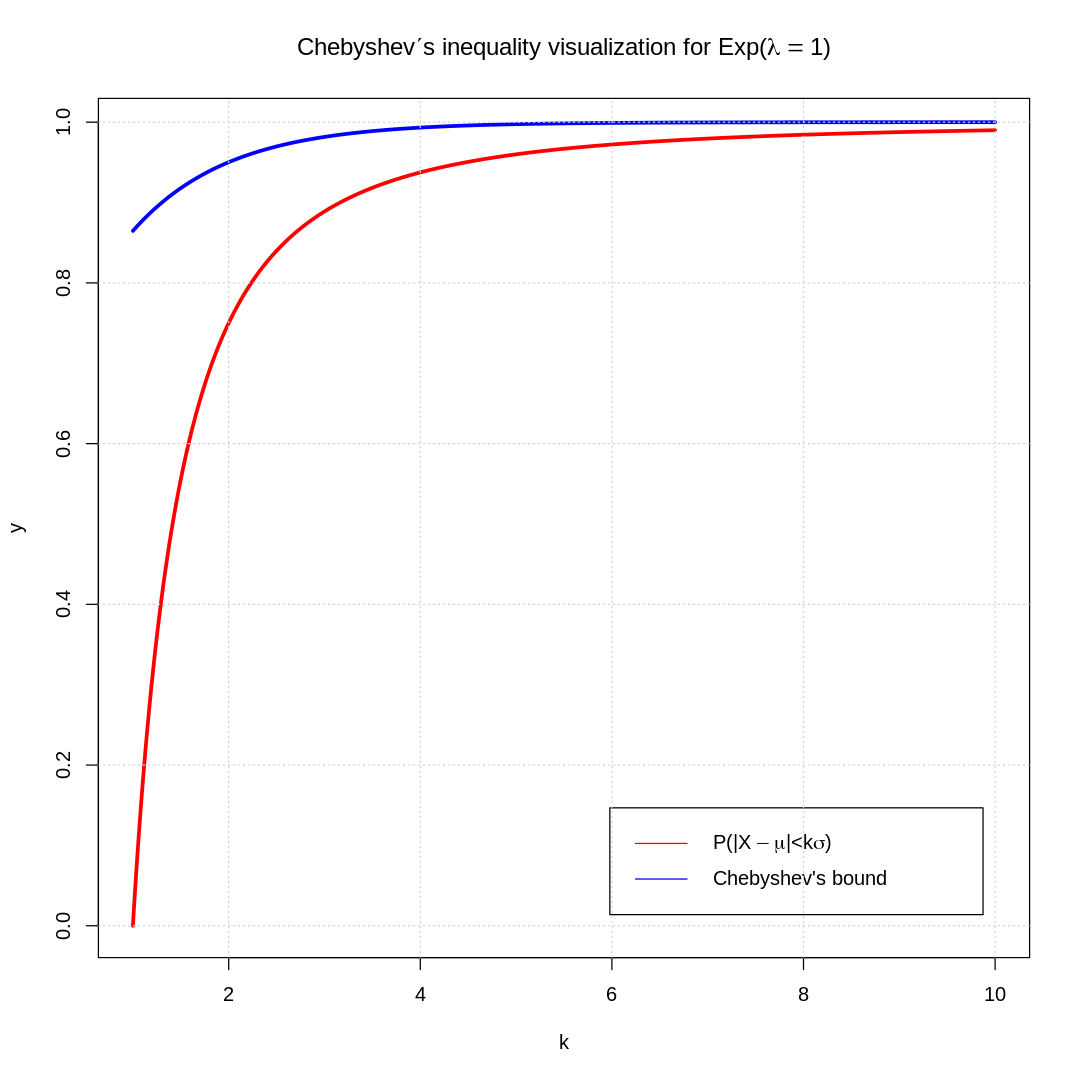

In [24]:
lambda <- 1
mu     <- 1 / lambda
sd     <- 1 / lambda

k <- seq(1, 10, 0.01)
g <- pexp(mu + k*sd, rate=lambda) - pexp(mu - k*sd, rate=lambda)
c <- 1 - 1/k^2


options(repr.plot.width=9, repr.plot.height=9)
plot (k, c, 
      col='red', 
      type='l', lwd=3,
      xlab='k', ylab='y', 
      main=TeX("Chebyshev's inequality visualization for $Exp(\\lambda = 1)$"))
lines(k, g, 
      lwd=3,
      col='blue', 
      type='l')
legend("bottomright", 
       inset=0.05, 
       legend=c(TeX("$P(| X - \\mu | < k \\sigma )$"),"Chebyshev's bound"),
       col=c("red", "blue"), 
       lty=1:1, 
       cex=1,
       box.lty=1)
grid()

### 4.3. - Uniform <a class="anchor" id="Ex4.3."></a>

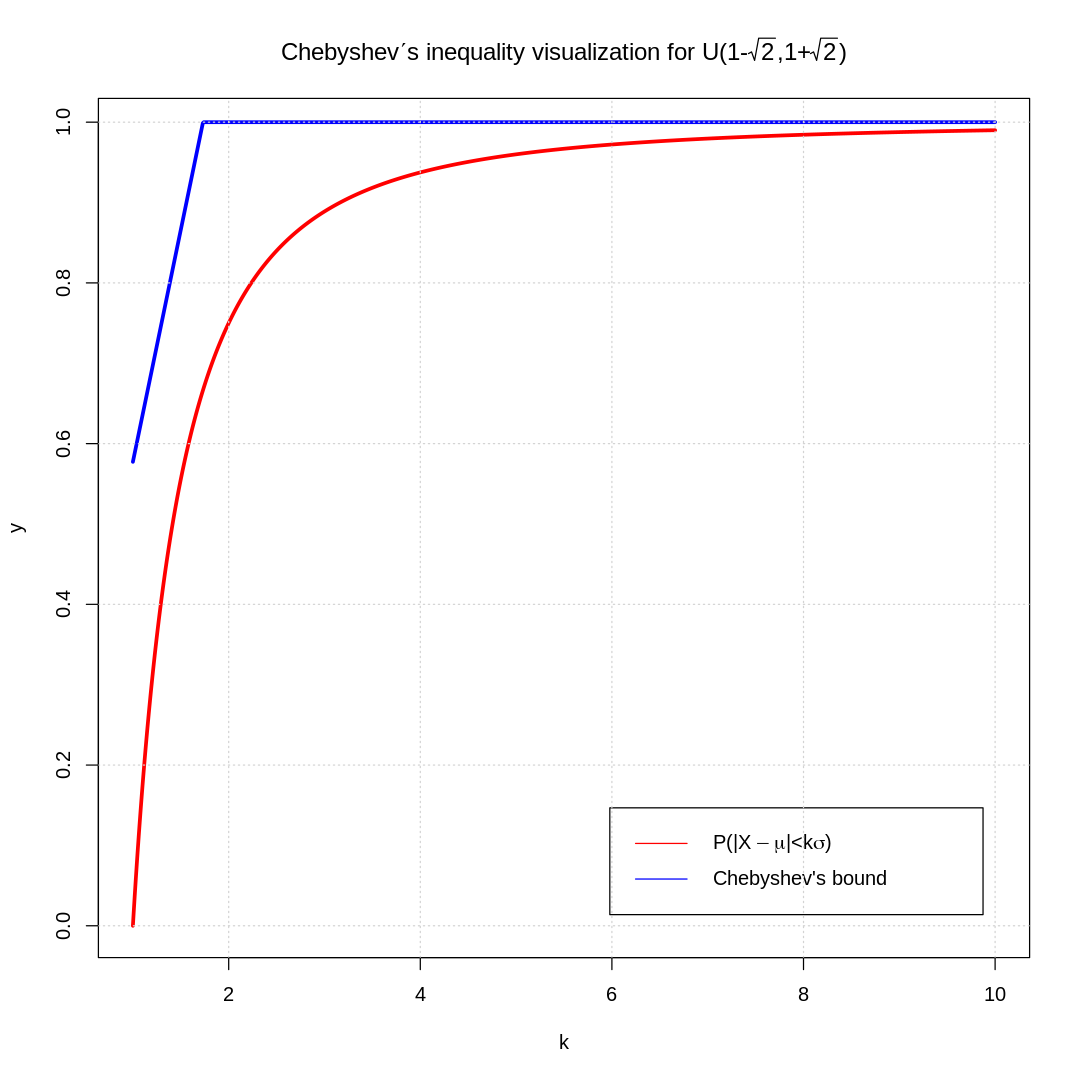

In [25]:
a  <- 1 - sqrt(2)
b  <- 1 + sqrt(2)
mu <- (a+b)/2
sd <- (b-a)/sqrt(12)

k <- seq(1, 10, 0.01)
g <- punif(mu + k*sd, min=a, max=b) - punif(mu - k*sd, min=a, max=b)
c <- 1 - 1/k^2


options(repr.plot.width=9, repr.plot.height=9)
plot (k, c, 
      col='red', 
      type='l', lwd=3,
      xlab='k', ylab='y', 
      main=TeX("Chebyshev's inequality visualization for $U(1-\\sqrt{2}, 1+\\sqrt{2})$"))
lines(k, g, 
      lwd=3,
      col='blue', 
      type='l')
legend("bottomright", 
       inset=0.05, 
       legend=c(TeX("$P(| X - \\mu | < k \\sigma )$"),"Chebyshev's bound"),
       col=c("red", "blue"), 
       lty=1:1, 
       cex=1,
       box.lty=1)
grid()

### 4.4. - Poisson <a class="anchor" id="Ex4.4."></a>

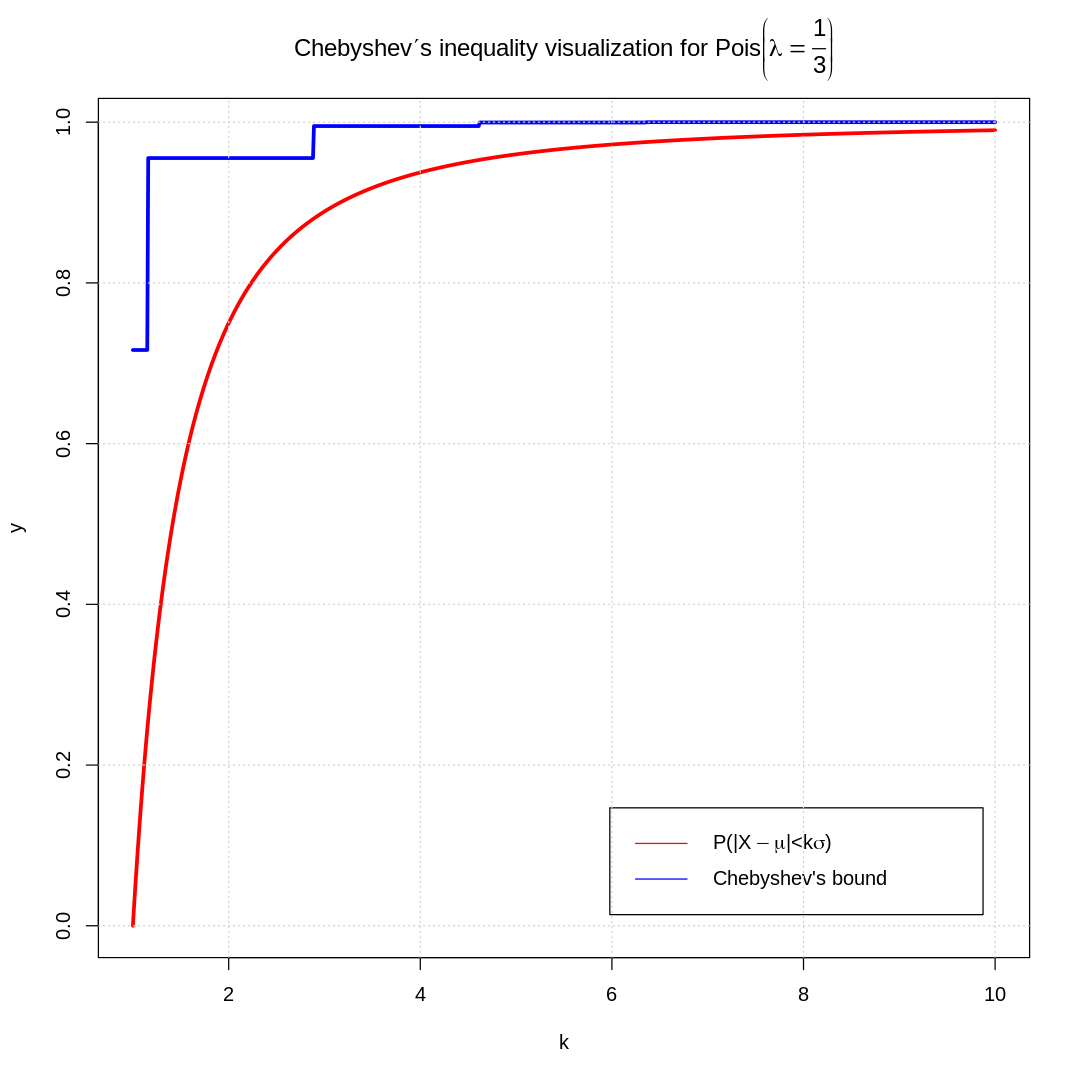

In [26]:
lambda <- 1/3
mu     <- lambda
sd     <- sqrt(lambda)

k <- seq(1, 10, 0.01)
g <- ppois(mu + k*sd, lambda=lambda) - ppois(mu - k*sd, lambda=lambda)
c <- 1 - 1/k^2


options(repr.plot.width=9, repr.plot.height=9)
plot (k, c, 
      col='red', 
      type='l', lwd=3,
      xlab='k', ylab='y', 
      main=TeX("Chebyshev's inequality visualization for $Pois\\left(\\lambda = \\frac{1}{3}\\right)$"))
lines(k, g, 
      lwd=3,
      col='blue', 
      type='l')
legend("bottomright", 
       inset=0.05, 
       legend=c(TeX("$P(| X - \\mu | < k \\sigma )$"),"Chebyshev's bound"),
       col=c("red", "blue"), 
       lty=1:1, 
       cex=1,
       box.lty=1)
grid()